In [ ]:
#MainFlow

#Final Task: Comprehensive Data Analysis, Visualization, and Feature Engineering using Pandas, NumPy, Matplotlib, and Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [4]:
# Load the Walmart Data Analysis and Forcasting dataset
df = pd.read_csv("C:\\Users\\Priyanshu\\Documents\\MainFlow\\archive\\Walmart Data Analysis and Forcasting.csv")

In [5]:
# Display the first few rows
print(df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [6]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [7]:
# Summary statistics
print(df.describe())

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


In [8]:
#Data Operations with Pandas and Numpy

In [9]:
# Check for missing values
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [22]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for any rows with NaT (Not a Time) and remove them if necessary
df.dropna(subset=['Date'], inplace=True)

In [23]:
# Check for missing values
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [24]:
# Depending on the data, you can fill or drop missing values
# For this example, let's fill missing 'Temperature' values with the median
df['Temperature'].fillna(df['Temperature'].median(), inplace=True)

# Ensure no missing values remain
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [25]:
# Create a new feature 'WeekOfYear'
df['WeekOfYear'] = df['Date'].dt.isocalendar().week

# Create a feature 'Year'
df['Year'] = df['Date'].dt.year

# Create a feature 'Month'
df['Month'] = df['Date'].dt.month

# Create interaction feature 'Sales_Per_Temperature'
df['Sales_Per_Temperature'] = df['Weekly_Sales'] / df['Temperature']

In [26]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
print(corr_matrix)

                              Store          Date  Weekly_Sales  Holiday_Flag  \
Store                  1.000000e+00  1.577299e-13     -0.335332 -4.386841e-16   
Date                   1.577299e-13  1.000000e+00      0.006949 -1.328524e-02   
Weekly_Sales          -3.353320e-01  6.949360e-03      1.000000  3.689097e-02   
Holiday_Flag          -4.386841e-16 -1.328524e-02      0.036891  1.000000e+00   
Temperature           -2.265908e-02  1.453566e-01     -0.063810 -1.550913e-01   
Fuel_Price             6.002295e-02  7.714439e-01      0.009464 -7.834652e-02   
CPI                   -2.094919e-01  7.715746e-02     -0.072634 -2.162091e-03   
Unemployment           2.235313e-01 -2.482029e-01     -0.106176  1.096028e-02   
WeekOfYear             3.106283e-15  1.596205e-01      0.074211  1.277427e-01   
Year                   3.474318e-12  9.416680e-01     -0.018378 -5.678257e-02   
Month                  2.910676e-15  1.456512e-01      0.076143  1.229958e-01   
Sales_Per_Temperature -1.904

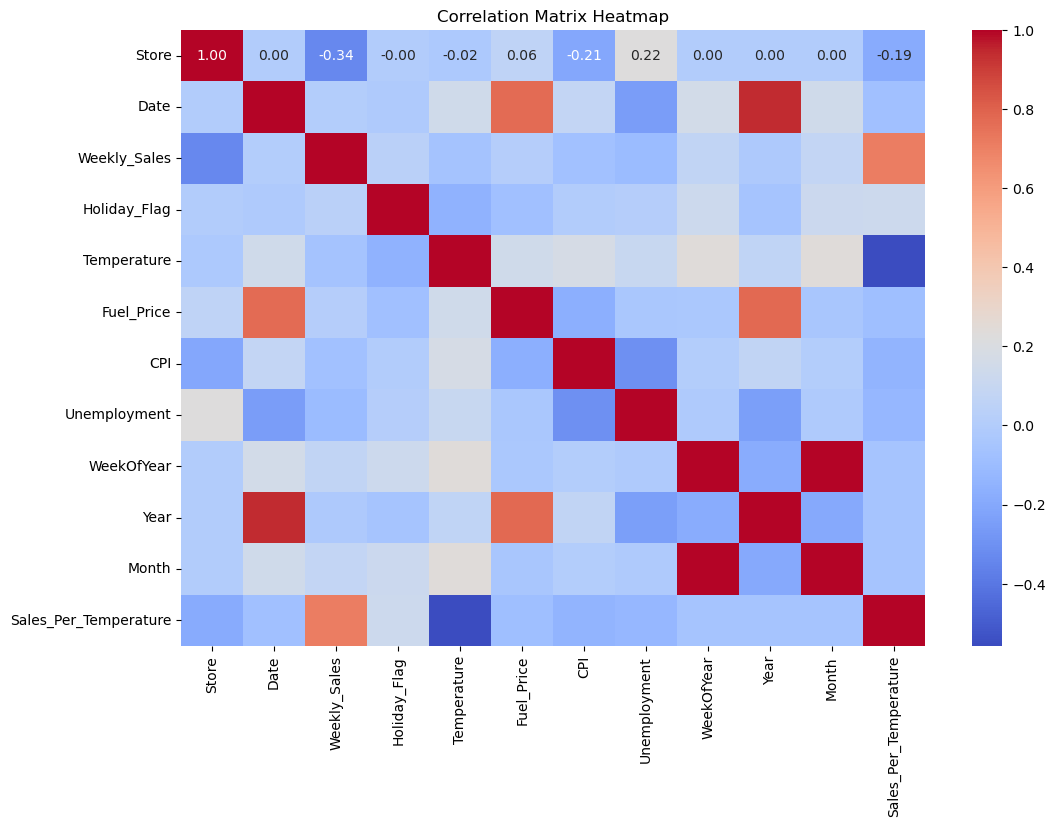

In [27]:
#Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

C:\Users\Priyanshu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


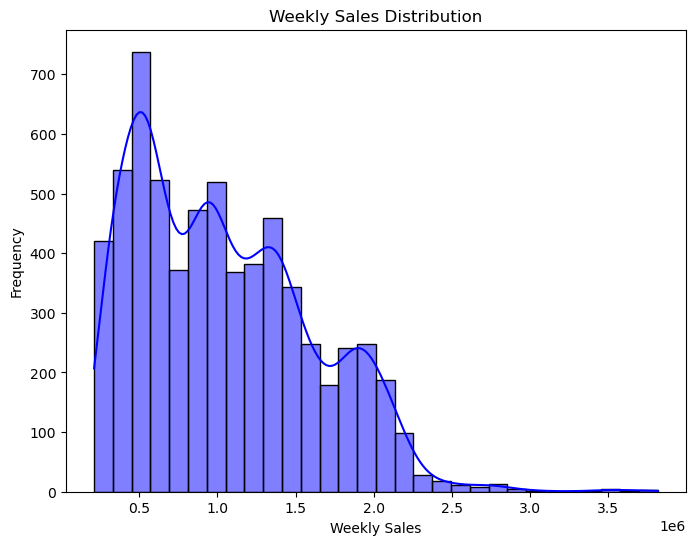

In [28]:
#Distribution Plots

plt.figure(figsize=(8, 6))
sns.histplot(df['Weekly_Sales'], bins=30, kde=True, color='blue')
plt.title('Weekly Sales Distribution')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

C:\Users\Priyanshu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Priyanshu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


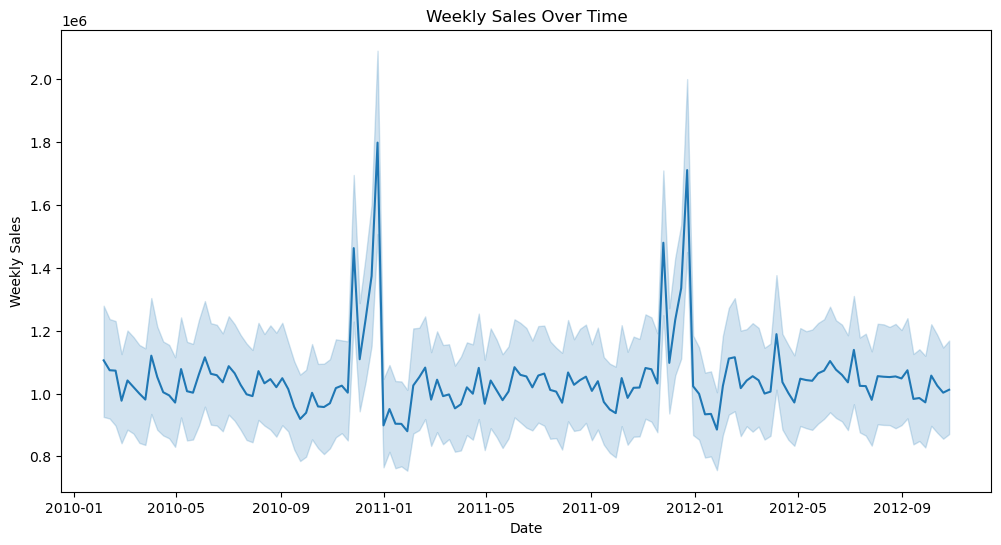

In [29]:
#Time Series Plot of Weekly Sales

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=df)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

C:\Users\Priyanshu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Priyanshu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


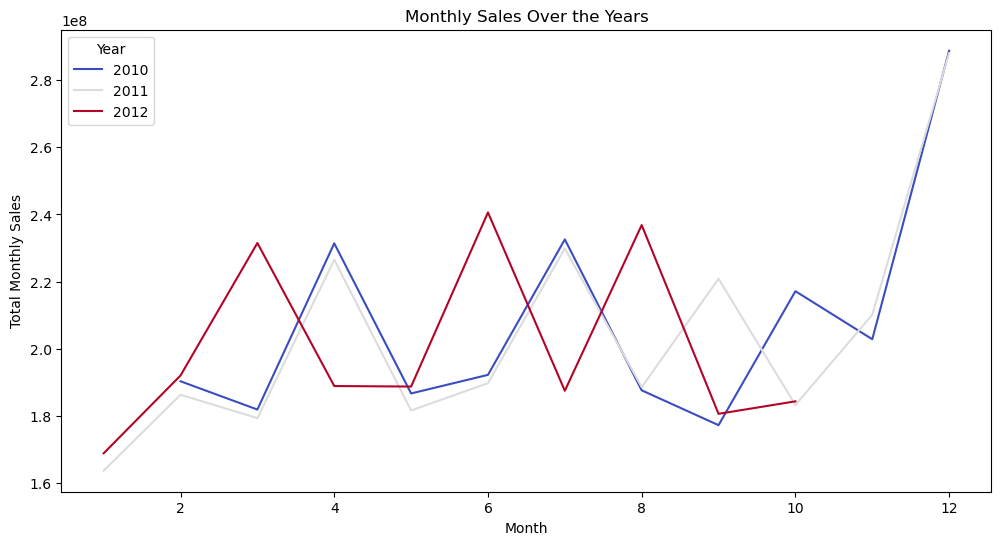

In [35]:
# Grouping by Year and Month
df_monthly = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

# Plotting Monthly Sales
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Weekly_Sales', hue='Year', data=df_monthly, palette='coolwarm')
plt.title('Monthly Sales Over the Years')
plt.xlabel('Month')
plt.ylabel('Total Monthly Sales')
plt.legend(title='Year')
plt.show()

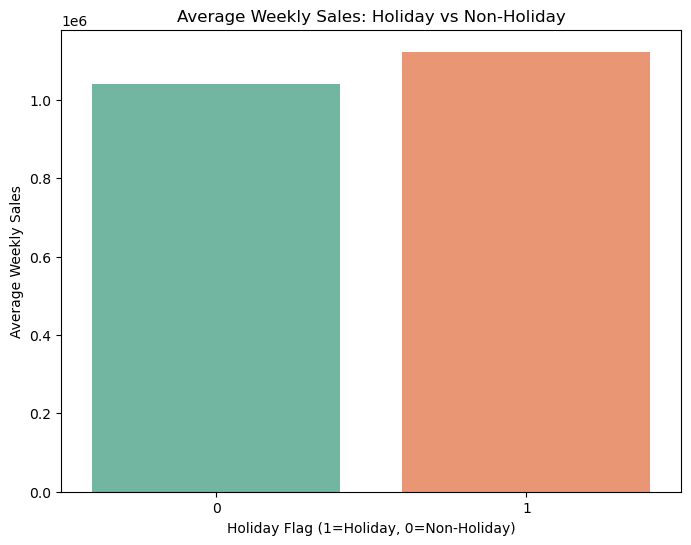

In [36]:
# Grouping data by Holiday Flag
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()

# Plotting Holiday vs Non-Holiday Sales
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=holiday_sales, palette='Set2')
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('Holiday Flag (1=Holiday, 0=Non-Holiday)')
plt.ylabel('Average Weekly Sales')
plt.show()

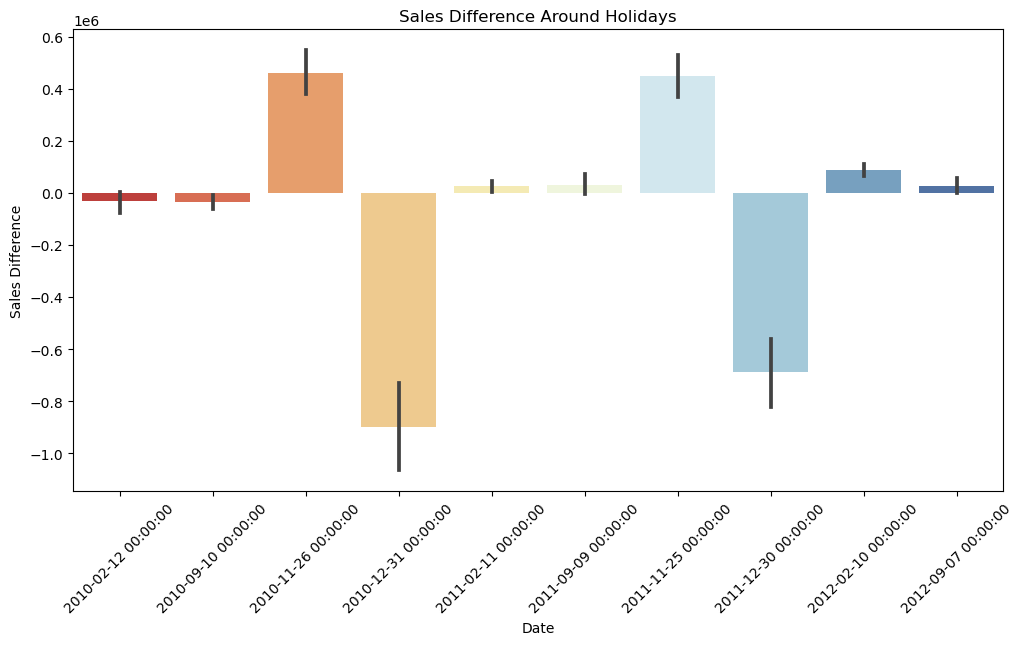

In [37]:
# Calculating sales difference
df['Prev_Week_Sales'] = df['Weekly_Sales'].shift(1)
df['Sales_Diff'] = df['Weekly_Sales'] - df['Prev_Week_Sales']

# Filtering data to show the sales difference around holidays
holiday_sales_diff = df[df['Holiday_Flag'] == 1][['Date', 'Weekly_Sales', 'Sales_Diff']]

# Plotting sales difference around holidays
plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='Sales_Diff', data=holiday_sales_diff, palette='RdYlBu')
plt.title('Sales Difference Around Holidays')
plt.xlabel('Date')
plt.ylabel('Sales Difference')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Creating lag features for Weekly Sales
df['Lag_1'] = df['Weekly_Sales'].shift(1)
df['Lag_2'] = df['Weekly_Sales'].shift(2)
df['Lag_3'] = df['Weekly_Sales'].shift(3)

# Dropping NA values generated due to lagging
df.dropna(inplace=True)

# Displaying the first few rows with lag features
print(df[['Date', 'Weekly_Sales', 'Lag_1', 'Lag_2', 'Lag_3']].head())

        Date  Weekly_Sales       Lag_1       Lag_2       Lag_3
3 2010-02-26    1409727.59  1611968.17  1641957.44  1643690.90
4 2010-03-05    1554806.68  1409727.59  1611968.17  1641957.44
5 2010-03-12    1439541.59  1554806.68  1409727.59  1611968.17
6 2010-03-19    1472515.79  1439541.59  1554806.68  1409727.59
7 2010-03-26    1404429.92  1472515.79  1439541.59  1554806.68


In [39]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag', 'WeekOfYear', 'Year', 'Lag_1', 'Lag_2', 'Lag_3']]
y = df['Weekly_Sales']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5145, 10) (1287, 10) (5145,) (1287,)
